<a href="https://colab.research.google.com/github/KIMCAT33/Tensorflow-2.0/blob/master/%ED%85%90%EC%84%9C%EB%B3%B4%EB%93%9C_%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서보드를 이용한 학습과정 표시하기 

<font size="4em">좋은 모델을 개발하려면 실험하는 모델 내부에서 어떤 일이 일어나는지 자주 그리고 많은 피드백을 받아야 합니다. 모델이 얼마나 잘 작동하는지 가능한 많은 정보를 얻는 것이 우리의 목적이기 때문입니다. 케라스는 가능한 최단 시간에 아이디어를 실험을 구현하도록 도와주며 실험 결과를 확인 하는 방법이 바로 텐서보드를 이용하는 것입니다.

---


![alt text](https://www.tensorflow.org/images/mnist_tensorboard.png)

Image take from: https://www.tensorflow.org/guide/summaries_and_tensorboard


In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras
import numpy as np

np.random.seed(3)


Using TensorFlow backend.


# **1. 데이터 셋 준비하기**

In [2]:
(X_train, Y_train) , (X_test, Y_test) = mnist.load_data() # 훈련 셋과 시험 셋 로딩

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
#훈련 셋과 검증 셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

MNIST 이미지 데이터를 각각 픽셀의 최대 값인 255로 나누어 줍니다. 

이것으로 각 픽셀은 [0, 1] 의 범위를 가지게 되는데, 이런 이미지 정규화를 통해 우리의 모델이 훈련을 좀 더 빠르게 할 수 있도록 만들어줍니다.

또한 MNIST 이미지 데이터는 (가로, 세로, 차원) = (28, 28, 1) 이므로 (데이터 수, 28*28) 사이즈로 reshape 해줍니다.

In [0]:
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [0]:
# 훈련 셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

In [0]:
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

In [0]:
# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기

In [8]:
model = Sequential()
model.add(Dense(2, input_shape=(28*28,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 모델 compile

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# 4. 텐서보드 설정 및 모델 학습시키기

In [24]:
 # 환경 및 경로 설정
 LOG_DIR = '/tmp/log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip

get_ipython().system_raw('./ngrok http 6006 &')

! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2019-09-23 04:58:25--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.72.230.122, 35.170.135.225, 52.71.139.107, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.72.230.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13607069 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  12.98M  7.72MB/s    in 1.7s    

2019-09-23 04:58:27 (7.72 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13607069/13607069]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ngrok                   
https://18bafae3.ngrok.io


<font size="4em">아래의 모델을 학습시킨 후 위 실행 결과로 생긴 URL("https://18bafae3.ngrok.io" )을 이용해 텐서보드를 확인할 수 있다. 

In [25]:


tb_hist = keras.callbacks.TensorBoard(log_dir=LOG_DIR,
                                      histogram_freq=0,
                                      write_graph=True,
                                      write_images=True)
hist = model.fit(X_train, Y_train,
                 epochs=100,
                 batch_size=10,
                 validation_data=(X_val, Y_val),
                 callbacks=[tb_hist])


Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 301us/step - loss: 1.4798 - acc: 0.3971 - val_loss: 2.0124 - val_acc: 0.2433
Epoch 2/100
700/700 [==============================] - 0s 283us/step - loss: 1.4806 - acc: 0.4000 - val_loss: 2.0120 - val_acc: 0.2233
Epoch 3/100
700/700 [==============================] - 0s 275us/step - loss: 1.4807 - acc: 0.3914 - val_loss: 2.0055 - val_acc: 0.2267
Epoch 4/100
700/700 [==============================] - 0s 283us/step - loss: 1.4799 - acc: 0.3971 - val_loss: 2.0049 - val_acc: 0.2300
Epoch 5/100
700/700 [==============================] - 0s 297us/step - loss: 1.4808 - acc: 0.3986 - val_loss: 2.0173 - val_acc: 0.2267
Epoch 6/100
700/700 [==============================] - 0s 280us/step - loss: 1.4784 - acc: 0.4000 - val_loss: 2.0417 - val_acc: 0.2367
Epoch 7/100
700/700 [==============================] - 0s 309us/step - loss: 1.4790 - acc: 0.3986 - val_loss: 2.0099 - val_acc: 0.2500
Epoch 8/1

# 5. 텐서보드 확인

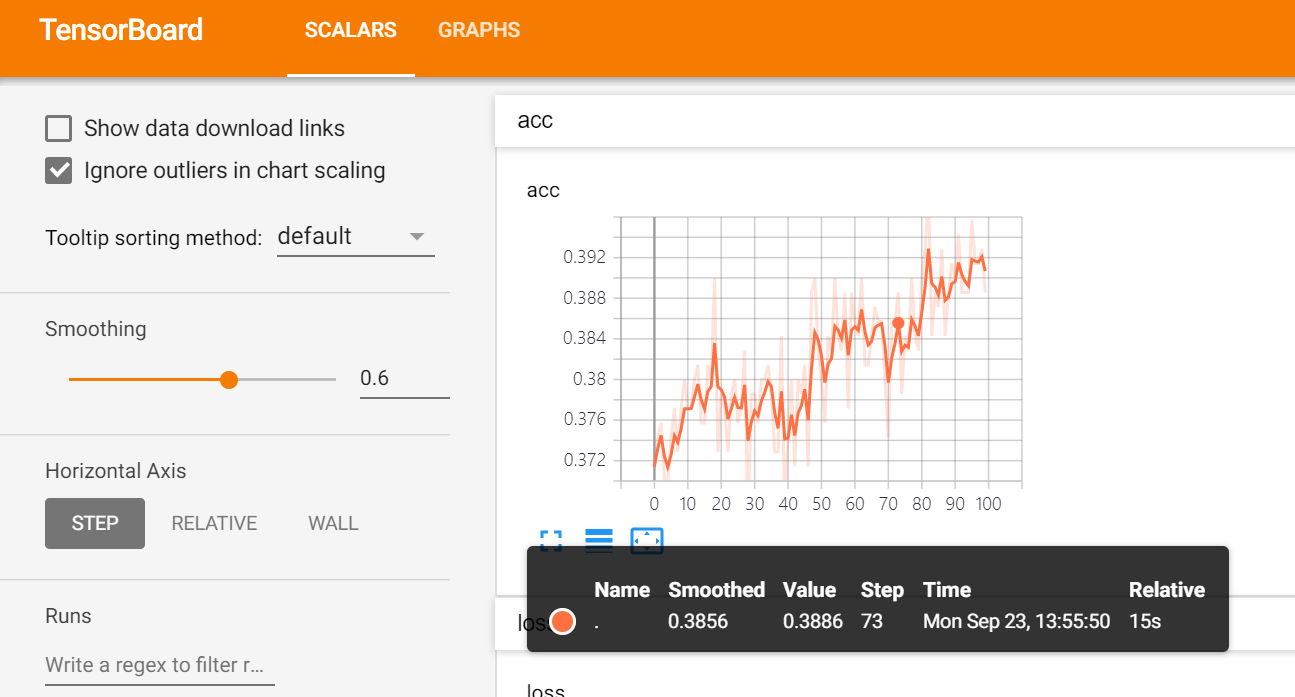